In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve

# Data preprocessing

In [2]:
filepath = '/Users/mac/Desktop/Kaggle_datasets/MNIST/train.csv'
df = pd.read_csv(filepath)
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_feature = df.iloc[:,1:]
df_label = df.iloc[:,0]

In [4]:
df_feature[0:5]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_label[0:5]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
df_feature_arr = scaler.fit(df_feature.values).transform(df_feature.values)

df_label_arr = df_label.values #scikit-learn的不用onehot encoding

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Model.fit: 這題是Multiple Classification

## naive_bayes.GaussianNB()

In [40]:
from sklearn import cross_validation, naive_bayes

#分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test = cross_validation.train_test_split(df_feature_arr, df_label_arr,
                                                                  test_size=0.25,random_state=0,
                                                                  stratify=df_label_arr) 

cls=naive_bayes.GaussianNB()
cls.fit(X_train,y_train)
print('Training Score: %.2f' % cls.score(X_train,y_train))
print('Testing Score: %.2f' % cls.score(X_test, y_test))

Training Score: 0.56
Testing Score: 0.56


## naive_bayes.MultinomialNB()

In [41]:
from sklearn import cross_validation, naive_bayes

#分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test = cross_validation.train_test_split(df_feature_arr, df_label_arr,
                                                                  test_size=0.25,random_state=0,
                                                                  stratify=df_label_arr) 

cls=naive_bayes.MultinomialNB()
cls.fit(X_train,y_train)
print('Training Score: %.2f' % cls.score(X_train,y_train))
print('Testing Score: %.2f' % cls.score(X_test, y_test))

Training Score: 0.82
Testing Score: 0.82


## DecisionTreeClassifier()

In [42]:
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier

#分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test = cross_validation.train_test_split(df_feature_arr, df_label_arr,
                                                                  test_size=0.25,random_state=0,
                                                                  stratify=df_label_arr) 

cls=DecisionTreeClassifier()
cls.fit(X_train,y_train)
print('Training Score: %.2f' % cls.score(X_train,y_train))
print('Testing Score: %.2f' % cls.score(X_test, y_test))

Training Score: 1.00
Testing Score: 0.86


## ensemble.AdaBoostClassifier(learning_rate=?)

In [46]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=10)
pca.fit(df_feature_arr)
df_feature_PCA = pca.transform(df_feature_arr)


from sklearn import cross_validation, ensemble

#分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test = cross_validation.train_test_split(df_feature_PCA, df_label_arr,
                                                                  test_size=0.25,random_state=0,
                                                                  stratify=df_label_arr) 

cls=ensemble.AdaBoostClassifier(learning_rate=0.1)
cls.fit(X_train,y_train)
print('Training Score: %.2f' % cls.score(X_train,y_train))
print('Testing Score: %.2f' % cls.score(X_test, y_test))

Training Score: 0.60
Testing Score: 0.59


## ensemble.GradientBoostingClassifier() :太久了...偷偷使用PCA降低維度，效果反而好

In [45]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=10)
pca.fit(df_feature_arr)
df_feature_PCA = pca.transform(df_feature_arr)


from sklearn import cross_validation, ensemble

#分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test = cross_validation.train_test_split(df_feature_PCA, df_label_arr,
                                                                  test_size=0.25,random_state=0,
                                                                  stratify=df_label_arr) 

cls=ensemble.GradientBoostingClassifier()
cls.fit(X_train,y_train)
print('Training Score: %.2f' % cls.score(X_train,y_train))
print('Testing Score: %.2f' % cls.score(X_test, y_test))

Training Score: 0.91
Testing Score: 0.87


## ensemble.RandomForestClassifier()

In [37]:
from sklearn import cross_validation, ensemble

#分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test = cross_validation.train_test_split(df_feature_arr, df_label_arr,
                                                                  test_size=0.25,random_state=0,
                                                                  stratify=df_label_arr) 

cls=ensemble.RandomForestClassifier()
cls.fit(X_train,y_train)
print('Training Score: %.2f' % cls.score(X_train,y_train))
print('Testing Score: %.2f' % cls.score(X_test, y_test))

Training Score: 1.00
Testing Score: 0.94


# Dimension reduction

## decomposition.PCA(n_components=10)

In [43]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=10)
pca.fit(df_feature_arr)
df_feature_PCA = pca.transform(df_feature_arr)
df_feature_PCA

array([[-2.59449319, -2.7423977 ,  0.71875369, ...,  0.3347447 ,
         1.36621133,  0.7967253 ],
       [ 6.6723595 , -1.41392761, -1.96786441, ..., -0.69201622,
        -0.02873267,  0.26681221],
       [-3.47801739, -1.15202232,  0.26335381, ..., -1.19686608,
        -0.76525665, -0.10136132],
       ..., 
       [ 1.31870582,  3.72554941, -0.66119573, ...,  2.56140544,
         0.33903179,  0.40242354],
       [ 1.28391919,  0.24320023,  2.73543752, ..., -0.448428  ,
        -0.64229849, -0.51113944],
       [-1.42842823,  1.64271765,  0.24666591, ..., -0.31401545,
        -0.07113196,  1.8562745 ]])

In [44]:
from sklearn import cross_validation, ensemble

#分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test = cross_validation.train_test_split(df_feature_PCA, df_label_arr,
                                                                  test_size=0.25,random_state=0,
                                                                  stratify=df_label_arr) 

cls=ensemble.RandomForestClassifier()
cls.fit(X_train,y_train)
print('Training Score: %.2f' % cls.score(X_train,y_train))
print('Testing Score: %.2f' % cls.score(X_test, y_test)) #效果有變差

Training Score: 1.00
Testing Score: 0.88


## Isomap: 時間太長了...用PCA降過的...還是太長！！

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)  #把圖片變成2個factor
iso.fit(df_feature_PCA)
data_projected = iso.transform(df_feature_PCA)
data_projected.shape

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=df_label_arr,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

# Confusion matrix: 使用PCA將成n=10，再使用GradientBoostingClassifier()

In [7]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=10)
pca.fit(df_feature_arr)
df_feature_PCA = pca.transform(df_feature_arr)

from sklearn import cross_validation, ensemble
#分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test = cross_validation.train_test_split(df_feature_PCA, df_label_arr,
                                                                  test_size=0.25,random_state=0,
                                                                  stratify=df_label_arr) 
cls=ensemble.GradientBoostingClassifier()
cls.fit(X_train,y_train)
print('Training Score: %.2f' % cls.score(X_train,y_train))
print('Testing Score: %.2f' % cls.score(X_test, y_test))
y_pred = cls.predict(X_test)

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
conf #confusion matrix本尊

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training Score: 0.91
Testing Score: 0.87


array([[ 953,    0,    7,    6,    1,   41,   12,    3,    7,    3],
       [   0, 1148,    2,    4,    1,    4,    4,    3,    0,    5],
       [  16,    7,  905,   11,   21,   11,   22,   16,   30,    5],
       [   8,   10,   29,  889,    6,   57,    8,    7,   63,   11],
       [   6,    6,   12,    2,  842,    5,   18,    5,   10,  112],
       [  26,    0,   11,   39,   12,  800,   12,    2,   19,   28],
       [  19,    6,   19,    2,    8,   19,  948,    1,   10,    2],
       [   6,    8,   17,    1,   16,    6,    1,  990,    9,   46],
       [   4,    6,   13,   58,    3,   32,    2,   10,  867,   21],
       [   3,    3,    3,   18,   94,   12,    4,   55,   17,  838]])

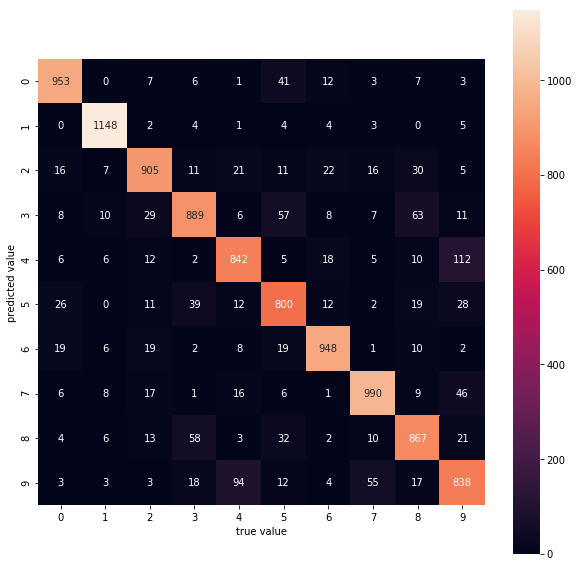

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(conf, square=True, annot=True, cbar=True, fmt='d')
plt.xlabel('true value')
plt.ylabel('predicted value')
plt.show()

In [12]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.92      0.92      0.92      1033
          1       0.96      0.98      0.97      1171
          2       0.89      0.87      0.88      1044
          3       0.86      0.82      0.84      1088
          4       0.84      0.83      0.83      1018
          5       0.81      0.84      0.83       949
          6       0.92      0.92      0.92      1034
          7       0.91      0.90      0.90      1100
          8       0.84      0.85      0.85      1016
          9       0.78      0.80      0.79      1047

avg / total       0.87      0.87      0.87     10500



# 使用scikit-learn，label不像DL需要做onehot_encoding，可以直接使用0~9即可